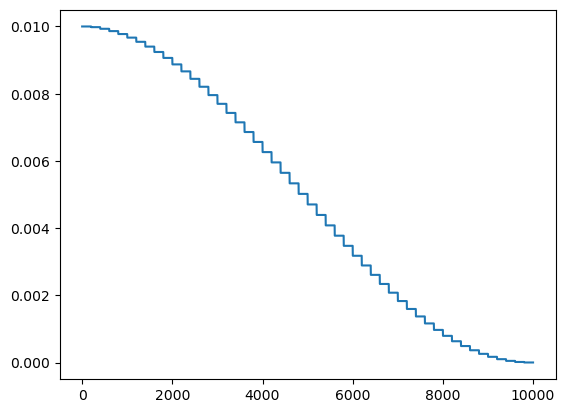

In [8]:
import numpy as np
import torch
from torchvision import models
import matplotlib.pyplot as plt

net = models.resnet18(pretrained=False)


max_epoch=50 # 一共50 epoch
iters=200    # 每个epoch 有 200 个 batch

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer = optimizer,
                                                        T_max =  max_epoch) #  * iters 


lr = []                                       
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()
        lr.append(scheduler.get_lr()[0])
    scheduler.step() # 注意 每个epoch 结束， 更新learning rate

plt.plot(np.arange(len(lr)), lr)
# plt.savefig('aa.jpg')

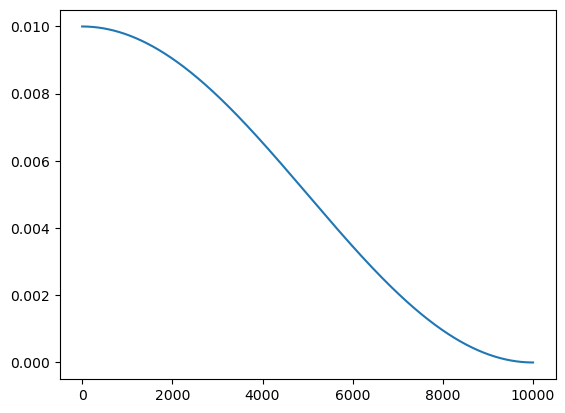

In [9]:
max_epoch=50 # 一共50 epoch
iters=200    # 每个epoch 有 200 个 batch

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer = optimizer,
                                                        T_max =  max_epoch * iters ) #  调整了四分之一周期的长度

lr = []                                       
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()
        scheduler.step() # 注意 每个batch 结束， 更新learning rate
        lr.append(scheduler.get_last_lr()[0])

plt.plot(np.arange(len(lr)), lr)

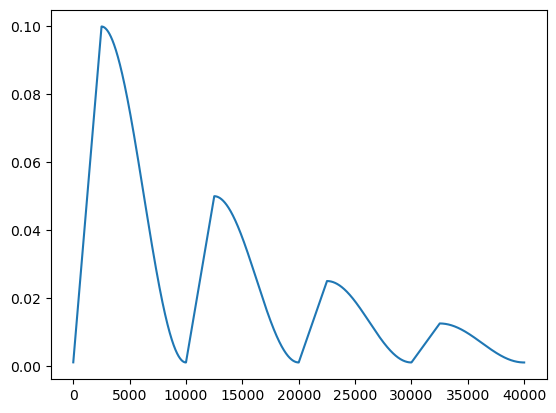

In [20]:
from utils.scheduler import CosineAnnealingWarmupRestarts

max_epoch=20 # 一共50 epoch
iters=2000    # 每个epoch 有 200 个 batch
cycle_steps = 1/4*max_epoch*iters
max_lr = 0.1

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler =  CosineAnnealingWarmupRestarts(optimizer,
                                          first_cycle_steps=cycle_steps,
                                          cycle_mult=1.0,
                                          max_lr=max_lr,
                                          min_lr=0.01*max_lr,
                                          warmup_steps=0.25*cycle_steps,
                                          gamma=0.5)

lr = []                                       
for epoch in range(max_epoch):
    for batch in range(iters):
        optimizer.step()
        scheduler.step() # 注意 每个batch 结束， 更新learning rate
        lr.append(scheduler.get_lr()[0])

plt.plot(np.arange(len(lr)), lr)